In [55]:
import pandas as pd
import numpy as np

In [56]:
# readind the data
df = pd.read_csv("car data.csv")

In [57]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [58]:
df.shape

(301, 9)

In [59]:
df.size

2709

In [60]:
df.ndim

2

In [61]:
# using unique() to know how many categorical variables are present in a single column
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [62]:
# using isnull() to know that is there any null values are not 
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [63]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [64]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [65]:
# removing 'Car_ Name' because it does not create any impact on the target variable
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [66]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [67]:
final_dataset['current_year'] = 2020

In [68]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [69]:
# create a column called 'no_years' because it is useful to know how old the car is
final_dataset['no_years'] = final_dataset['current_year'] - final_dataset['Year']

In [70]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [71]:
# here we are deleting 'Year' and 'current_year' columns because 'no_years' is better than those columns
final_dataset.drop(['Year','current_year'],axis=1,inplace=True)

In [72]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [73]:
# using 'get_dummies' function we converting categorial columns into numerical columns
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [74]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [75]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [76]:
import seaborn as sns

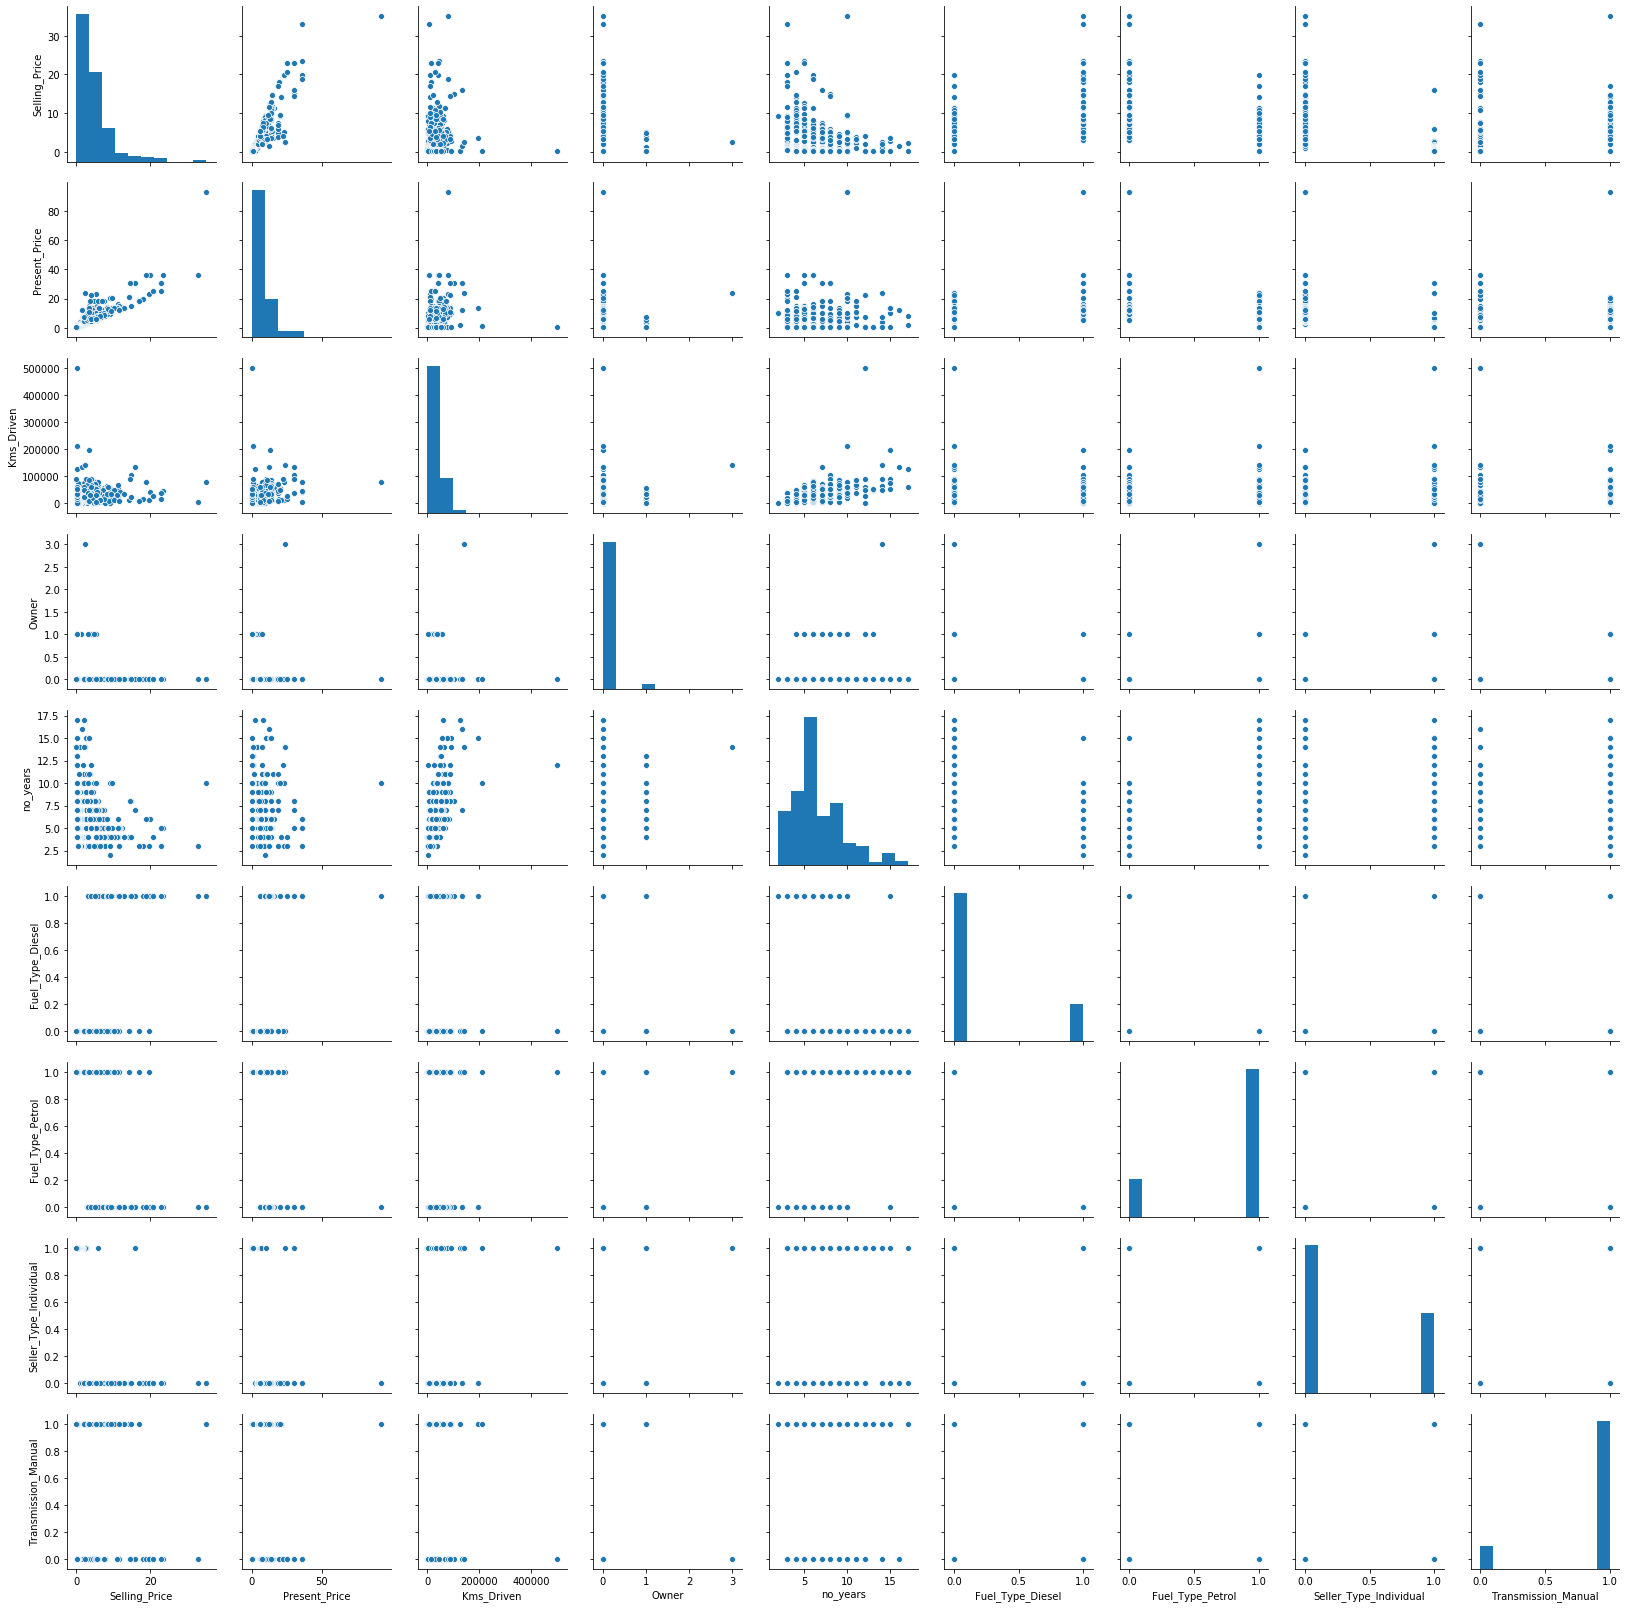

In [77]:
sns.pairplot(final_dataset)

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

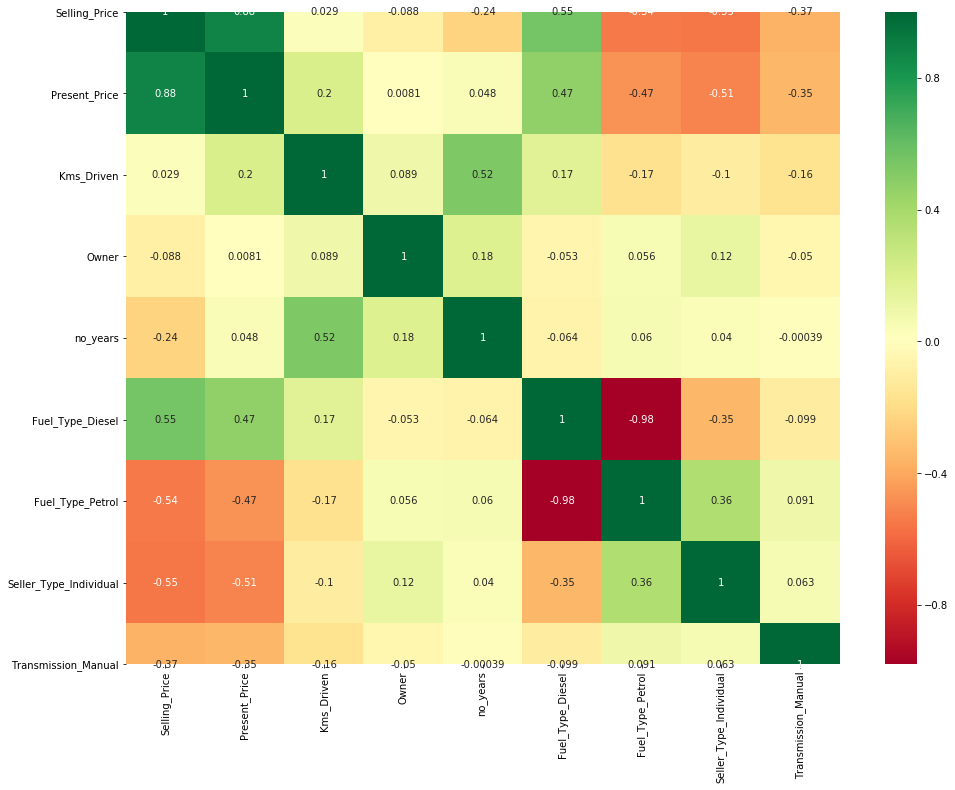

In [79]:
# here we use 'heatmap' to visualise yhe correlation between the columns
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,12))
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [80]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [81]:
# creating the independent and dependent variables
x = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [82]:
x.head()

,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [83]:

y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [84]:
# feature importance
from sklearn.ensemble import ExtraTreesRegressor

In [85]:
model = ExtraTreesRegressor()

In [86]:
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [87]:
model.feature_importances_

array([0.36677211, 0.03809159, 0.0008316 , 0.07807841, 0.23227526,
       0.01718428, 0.11958357, 0.14718319])

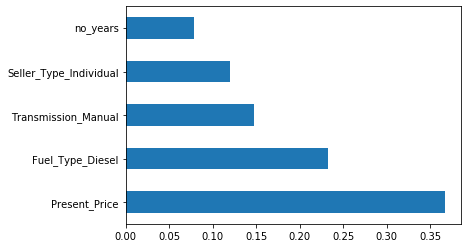

In [88]:
feat_importances = pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [91]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((240, 8), (240,), (61, 8), (61,))

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
rf_random = RandomForestRegressor()

In [94]:
# hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [95]:
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [98]:
rf = RandomForestRegressor()

In [99]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,
                              cv=5,verbose=2,random_state=42,n_jobs=1)

In [100]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   41.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [101]:
predictions = rf_random.predict(x_test)
print(predictions)

[ 1.15839237  0.69864971  5.26037626  2.69243318  7.04169757  5.52383366
  4.57493004  0.48471318  0.43366096  7.13666897  2.82709487  1.34300104
  4.55635529  0.71811279  5.29584672  5.77961597  1.23573813  3.12292633
  4.3255542   8.09565139  0.28310863  0.27150979  0.52634083  0.25900134
  4.68543665  5.20952687  0.55502324  0.27150979  7.61596393  3.79637492
  0.25696481  2.65736918  5.68375373  7.55723829  0.59551656  2.87212401
  7.99010889 21.5038383  11.64064057  7.45327096  7.15149375  5.05062063
  0.25728506  5.57404507  0.26105988  9.62300924  1.27876837  8.99939323
  3.38604684  9.51078482  0.53419908  5.33811912  0.6783672   1.1912987
  5.73768877  3.00678007  0.51492948  6.39968635  1.17368771  7.55525614
  0.33331527]


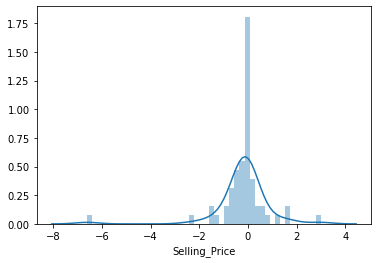

In [102]:
sns.distplot(y_test-predictions)

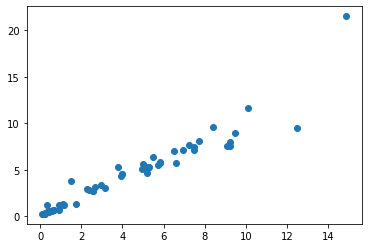

In [103]:
plt.scatter(y_test,predictions)

In [104]:
# comparing the 'y_test' and our predictions
comparing_result = pd.DataFrame({'y_test':y_test,'predictions':predictions})
comparing_result.head(10)

,y_test,predictions
118,1.10,1.158392
134,0.65,0.698650
214,5.25,5.260376
227,2.55,2.692433
7,6.50,7.041698
206,5.75,5.523834
264,4.00,4.574930
176,0.35,0.484713
169,0.40,0.433661
272,7.50,7.136669


In [105]:
import pickle

In [106]:
file = open('random_forest_regression_model.pkl','wb')

In [107]:
pickle.dump(rf_random,file)